<a href="https://colab.research.google.com/github/AmiraFadl/NMA-Project/blob/main/notebook/load_kay_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# @title Download the data

import os, requests, tarfile

fnames = ["kay_labels.npy", "kay_labels_val.npy", "kay_images.npz"]
urls = ["https://osf.io/r638s/download",
        "https://osf.io/yqb3e/download",
        "https://osf.io/ymnjv/download"]

for fname, url in zip(fnames, urls):
  if not os.path.isfile(fname):
    try:
      r = requests.get(url)
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        print(f"Downloading {fname}...")
        with open(fname, "wb") as fid:
          fid.write(r.content)
        print(f"Download {fname} completed!")

Download kay_labels.npy completed!
Download kay_labels_val.npy completed!
Download kay_images.npz completed!


In [ ]:
with np.load(fname) as dobj:
  dat = dict(**dobj)
  dat2 = dict(**dobj)
labels = np.load('kay_labels.npy')
labels_backup = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')
val_labels_backup = np.load('kay_labels_val.npy')


`labels` is a 4 by stim array of class names:  
- row 3 has the labels predicted by a deep neural network (DNN) trained on Imagenet
- rows 0-2 correspond to different levels of the wordnet hierarchy for the DNN predictions

In [ ]:
import pandas as pd
from operator import indexOf

labels_catg =pd.Series(labels[0])
labels_catg = labels_catg.unique()

print(labels_catg)
# animal = []
# geo_form = []
# i = 0

# for i in range(len(labels[0])):
#   if labels[0][i] == 'animal':
#     animal.append(i)
#   if labels[0][i] == 'geological formation':
#     geo_form.append(i)  

new_categ_labels = np.array(pd.read_csv("/content/new_labels_ai.csv"))
new_categ_labels= np.reshape(new_categ_labels, 1749)
new_categ_labels =np.insert(new_categ_labels,0, [1])

inanimate_only_labels = []

for i in range(len(new_categ_labels)):
  if new_categ_labels[i] == 0:
      inanimate_only_labels.append(i)

print(len(inanimate_only_labels))

random_inanimate_index = np.random.choice(inanimate_only_labels, 144, replace=False)

new_resp_tobalance = np.delete(dat2["responses"],random_inanimate_index , axis=0)
new_labels_tobalance = np.delete(new_categ_labels, random_inanimate_index , axis=0, )

print("new responses to balance",len(new_resp_tobalance))
print("new labels to balance",len(new_labels_tobalance))
print("New Animate pictures indecies count", (new_labels_tobalance==0).sum()) 


# geo_form = np.array(geo_form)
# animal = np.array(animal)

print("New labels shape", new_categ_labels.shape) 
print("Animate pictures indecies count", (new_categ_labels==1).sum()) 
print("Inanimate pictures indecies count", (new_categ_labels==0).sum())   

# print("animal pictures inecies count", animal.shape) 
# print("geological formation pictures indecies count", geo_form.shape)   

print(new_categ_labels)

['artifact' 'entity' 'animal' 'geological formation' 'fruit' 'fungus'
 'person' 'plant']
947
new responses to balance 1606
new labels to balance 1606
New Animate pictures indecies count 803
New labels shape (1750,)
Animate pictures indecies count 803
Inanimate pictures indecies count 947
[1 0 1 ... 0 1 1]


In [ ]:
print(dat.keys())

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


`dat` has the following fields:  
- `stimuli`: stim x i x j array of grayscale stimulus images
- `stimuli_test`: stim x i x j array of grayscale stimulus images in the test set  
- `responses`: stim x voxel array of z-scored BOLD response amplitude
- `responses_test`:  stim x voxel array of z-scored BOLD response amplitude in the test set  
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels

In [ ]:
print(dat["stimuli"].shape)
print(dat["responses"].shape) # 8428 voxels amplitudes for each image and they are z-scored (zero mean and one standard deviation)
print(dat["roi"].shape) # 8428 voxels labels from 0-7 relating it to regions of intreset which names are stored in roi_names (v1, v2, ...)
print(dat["roi_names"].shape)

(1750, 128, 128)
(1750, 8428)
(8428,)
(8,)


In [ ]:
print(dat["roi_names"])

['Other' 'V1' 'V2' 'V3' 'V3A' 'V3B' 'V4' 'LatOcc']


In [ ]:
from operator import indexOf


# animal_resp = dat["responses"][animal]
# geo_form_resp = dat["responses"][geo_form]

##################### ANIMATE AND INANIMATE RESPONSES

# animate_resp = dat["responses"][animate_index]
# inanimate_resp = dat["responses"][inanimate_index]

##################

# ones = np.ones(400)
# zerosa = np.zeros(100)

########### extracting indecies of each region 
roi_arr= dat["roi"].flatten()
index_latoc = []
index_v1 = []
index_v2 = []
index_v3= []
index_v3a = []
index_v3b = []
index_v4= []


for i in range(len(roi_arr)):
  if roi_arr[i] == 1:
      index_v1.append(i)
  if roi_arr[i] == 2:
      index_v2.append(i)
  if roi_arr[i] == 3:
      index_v3.append(i)
  if roi_arr[i] == 4:
      index_v3a.append(i)  
  if roi_arr[i] == 5:
      index_v3b.append(i)       
  if roi_arr[i] == 6:
      index_v4.append(i)  
  if roi_arr[i] == 7:
      index_latoc.append(i)  
#################3

# animal_resp_v1 = animal_resp[:, index_v1]
# geo_form_resp_v1 = geo_form_resp[:, index_v1]

# animal_resp_v2 = animal_resp[:, index_v2]
# geo_form_resp_v2 = geo_form_resp[:, index_v2]

# animal_resp_v3 = animal_resp[:, index_v3]
# geo_form_resp_v3 = geo_form_resp[:, index_v3]

# animal_resp_v4 = animal_resp[:, index_v4]
# geo_form_resp_v4 = geo_form_resp[:, index_v4]

index_v1 = np.array(index_v1)
index_v2 = np.array(index_v2)
index_v3 = np.array(index_v3)
index_v3a = np.array(index_v3a)
index_v3b = np.array(index_v3b)
index_v4 = np.array(index_v4)
index_latoc = np.array(index_latoc)

print("V1 indices", index_v1.shape)
print("V2 indices", index_v2.shape)
print("V3 indices", index_v3.shape)
print("V3A indices", index_v3a.shape)
print("V3B indices", index_v3b.shape)
print("V4 indices", index_v4.shape)
print("LatOcc indices", index_latoc.shape)

mean = np.average(new_resp_tobalance)
print("mean of V1 responses", mean)

# print("animal V1 responses", animal_resp_v1.shape)
# print("geo_form V1 responses", geo_form_resp_v1.shape)

# print("animal V2 responses", animal_resp_v2.shape)
# print("geo_form V2 responses", geo_form_resp_v2.shape)

# print("animal V3 responses", animal_resp_v3.shape)
# print("geo_form V3 responses", geo_form_resp_v3.shape)

# print("animal V4 responses", animal_resp_v4.shape)
# print("geo_form V4 responses", geo_form_resp_v4.shape)


# animal_resp_labeled = np.concatenate((animal_resp, ones[:, None]), axis =1)
# geo_form_resp_labeled = np.concatenate((geo_form_resp, zerosa[:, None]), axis =1)

###################################### ANIMATE AND INANIMATE CATEGORIES AFTER MANUAL EXTRACTION AND RELABELING


# animate_resp_labeled = np.concatenate((animate_resp, ones[:, None]), axis =1)
# inanimate_resp_labeled = np.concatenate((inanimate_resp, zerosa[:, None]), axis =1)


########################


# difference_test = animal_resp[0:len(geo_form_resp)] - geo_form_resp
# # print(indexOf (difference_test ,difference_test.max()))
# result = np.where(difference_test == np.amax(difference_test))
# print(result[0])




# print(animal_resp_labeled.shape)
# print(geo_form_resp_labeled.shape)

# print(ones.shape)
# print(animal_resp.shape) 
# print(geo_form_resp.shape) 

################### playing around


# x = np.concatenate((animal_resp[:400, :], geo_form_resp[:100, :]), axis = 0 )

# y = np.concatenate((ones, zerosa), axis=0) # it is the same in all subsets

# x_v1 = np.concatenate((animal_resp_v1[:400, :], geo_form_resp_v1[:100, :]), axis = 0 )

# x_v2 = np.concatenate((animal_resp_v2[:400, :], geo_form_resp_v2[:100, :]), axis = 0 )

# x_v3 = np.concatenate((animal_resp_v3[:400, :], geo_form_resp_v3[:100, :]), axis = 0 )

# x_v4 = np.concatenate((animal_resp_v4[:400, :], geo_form_resp_v4[:100, :]), axis = 0 )

########################## real work
# from sklearn.model_selection import train_test_split
# np.delete(labels[0], np.where(labels[0] == 'plant'))
# v1_train, v1_test, y_train, y_test = train_test_split(dat["responses"][:, index_v1], labels[0], test_size=0.40, random_state=42)
# v2_train, v2_test = train_test_split(dat["responses"][:, index_v2], test_size=0.40, random_state=42)
# v3_train, v3_test = train_test_split(dat["responses"][:, index_v3], test_size=0.40, random_state=42)
# v4_train, v4_test = train_test_split(dat["responses"][:, index_v4], test_size=0.40, random_state=42)


# clf = svm.SVC(class_weight='balanced', C= 0.0001, probability=True, random_state= 42)

# clf_v1 = svm.SVC(class_weight='balanced', C= 0.0001)
# clf_v2 = svm.SVC(class_weight='balanced', C= 0.0001)
# clf_v3 = svm.SVC(class_weight='balanced', C= 0.0001)
# clf_v4 = svm.SVC(class_weight='balanced', C= 0.0001)


# clf_v1_all = svm.SVC(decision_function_shape='ovo', class_weight='balanced', C= 0.0001)
# clf_v2_all = svm.SVC(decision_function_shape='ovo', class_weight='balanced', C= 0.0001)
# clf_v3_all = svm.SVC(decision_function_shape='ovo', class_weight='balanced', C= 0.0001)
# clf_v4_all = svm.SVC(decision_function_shape='ovo', class_weight='balanced', C= 0.0001)


# clf.fit(np.concatenate((animal_resp_v1[:400, :], geo_form_resp_v1[:100, :]), axis = 0 ), y)

# clf_v1.fit( x_v1,y) 
# clf_v2.fit( x_v2,y) 
# clf_v3.fit( x_v3,y) 
# clf_v4.fit( x_v4,y) 

# clf_v1_all.fit(v1_train, y_train )
# clf_v2_all.fit(v2_train, y_train )
# clf_v3_all.fit(v3_train, y_train)
# clf_v4_all.fit(v4_train, y_train)


# print("v1 new train/test", v1_train.shape, y_train.shape )
# print("v2 new train/test", v2_train.shape, y_train.shape )
# print("v3 new train/test", v3_train.shape, y_train.shape )
# print("v4 new train/test",v4_train.shape, y_train.shape )

#################### last work
from sklearn import svm

# clf_an_ina = svm.SVC(class_weight='balanced', kernel= 'sigmoid')

# clf_an_ina_v1 = svm.SVC(class_weight='balanced', kernel= 'sigmoid')
# clf_an_ina_v2 = svm.SVC(class_weight='balanced',  kernel= 'sigmoid')
# clf_an_ina_v3 = svm.SVC(class_weight='balanced',  kernel= 'sigmoid')
# clf_an_ina_v3a = svm.SVC(class_weight='balanced',  kernel= 'sigmoid')
# clf_an_ina_v3b = svm.SVC(class_weight='balanced', kernel= 'sigmoid')
# clf_an_ina_v4 = svm.SVC(class_weight='balanced', kernel= 'sigmoid')
# clf_an_ina_latoc = svm.SVC(class_weight='balanced', kernel= 'sigmoid')

clf_an_ina = svm.SVC( kernel= 'linear')

clf_an_ina_v1 = svm.SVC( kernel= 'linear')
clf_an_ina_v2 = svm.SVC(  kernel= 'linear')
clf_an_ina_v3 = svm.SVC(  kernel= 'linear')
clf_an_ina_v3a = svm.SVC(  kernel= 'linear')
clf_an_ina_v3b = svm.SVC( kernel= 'linear')
clf_an_ina_v4 = svm.SVC( kernel= 'linear')
clf_an_ina_latoc = svm.SVC(kernel= 'linear')

# clf_an_ina.fit(dat["responses"], new_categ_labels)

# clf_an_ina_v1.fit(dat["responses"][:, index_v1], new_categ_labels)
# clf_an_ina_v2.fit(dat["responses"][:, index_v2], new_categ_labels)
# clf_an_ina_v3.fit(dat["responses"][:, index_v3], new_categ_labels)
# clf_an_ina_v3a.fit(dat["responses"][:, index_v3a], new_categ_labels)
# clf_an_ina_v3b.fit(dat["responses"][:, index_v3b], new_categ_labels)
# clf_an_ina_v4.fit(dat["responses"][:, index_v4], new_categ_labels)
# clf_an_ina_latoc.fit(dat["responses"][:, index_latoc], new_categ_labels)

clf_an_ina.fit(new_resp_tobalance, new_labels_tobalance)

clf_an_ina_v1.fit(new_resp_tobalance[:, index_v1], new_labels_tobalance)
clf_an_ina_v2.fit(new_resp_tobalance[:, index_v2], new_labels_tobalance)
clf_an_ina_v3.fit(new_resp_tobalance[:, index_v3], new_labels_tobalance)
clf_an_ina_v3a.fit(new_resp_tobalance[:, index_v3a], new_labels_tobalance)
clf_an_ina_v3b.fit(new_resp_tobalance[:, index_v3b], new_labels_tobalance)
clf_an_ina_v4.fit(new_resp_tobalance[:, index_v4], new_labels_tobalance)
clf_an_ina_latoc.fit(new_resp_tobalance[:, index_latoc], new_labels_tobalance)


mean of V1 responses -4.9205069583629874e-05


In [ ]:
# # Multi-Dimensional Discrimination

# # clf_md = svm.SVC(decision_function_shape='ovo')
# # clf_md.fit(dat["responses"], labels[0, :])

# # testt = clf_md.predict(dat["responses"][0:5])
# # print(testt)
# v1_predd = clf_v1_all.predict(v1_test)
# v2_predd = clf_v2_all.predict(v2_test)
# v1_all_pred = clf_v1_all.predict(np.concatenate((dat["responses_test"][:, index_v1], v1_test), axis=0 ))
# v2_all_pred = clf_v2_all.predict(np.concatenate((dat["responses_test"][:, index_v2], v2_test), axis=0 ))
# v3_all_pred = clf_v3_all.predict(np.concatenate((dat["responses_test"][:, index_v3], v3_test), axis=0 ))
# v4_all_pred = clf_v4_all.predict(np.concatenate((dat["responses_test"][:, index_v4], v4_test), axis=0 ))

# print(np.sum(v1_all_pred==v4_all_pred))


In [ ]:
# from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import confusion_matrix


new_test_labels = np.array(pd.read_csv("/content/new_test_labels.csv",  index_col= 0))
new_test_labels = np.reshape(new_test_labels, 120)
print(new_test_labels)
print((new_test_labels== 1).sum(), "of 120 resposes relate to Animate category")

###################### test dataset balance

# inanimate_only_testlabels = []

# for i in range(len(new_test_labels)):
#   if new_test_labels[i] == 0:
#       inanimate_only_testlabels.append(i)

# print(len(inanimate_only_testlabels))

# random_inanimate_test_index = np.random.choice(inanimate_only_testlabels, 4, replace=False)

# new_resp__test_tobalance = np.delete(dat2["responses_test"],random_inanimate_test_index , axis=0)
# new_labels_test_tobalance = np.delete(new_test_labels, random_inanimate_test_index , axis=0, )

# print("new test responses to balance",len(new_resp__test_tobalance))
# print("new test labels to balance",len(new_labels_test_tobalance))
# print("New test Inanimate pictures indecies count", (new_labels_test_tobalance==0).sum()) 


####################
# an_ina_predict = clf_an_ina.predict(new_resp__test_tobalance)

# an_ina_predict_v1 = clf_an_ina_v1.predict(new_resp__test_tobalance[:, index_v1])
# an_ina_predict_v2 = clf_an_ina_v2.predict(new_resp__test_tobalance[:, index_v2])
# an_ina_predict_v3 = clf_an_ina_v3.predict(new_resp__test_tobalance[:, index_v3])
# an_ina_predict_v3a = clf_an_ina_v3a.predict(new_resp__test_tobalance[:, index_v3a])
# an_ina_predict_v3b = clf_an_ina_v3b.predict(new_resp__test_tobalance[:, index_v3b])
# an_ina_predict_v4 = clf_an_ina_v4.predict(new_resp__test_tobalance[:, index_v4])
# an_ina_predict_latoc = clf_an_ina_latoc.predict(new_resp__test_tobalance[:, index_latoc])

# cm_all = confusion_matrix(new_labels_test_tobalance, an_ina_predict )

# cm_v1 = confusion_matrix(new_labels_test_tobalance, an_ina_predict_v1 )
# cm_v2 = confusion_matrix(new_labels_test_tobalance, an_ina_predict_v2 )
# cm_v3 = confusion_matrix(new_labels_test_tobalance, an_ina_predict_v3 )
# cm_v3a = confusion_matrix(new_labels_test_tobalance, an_ina_predict_v3a )
# cm_v3b = confusion_matrix(new_labels_test_tobalance, an_ina_predict_v3b )
# cm_v4 = confusion_matrix(new_labels_test_tobalance, an_ina_predict_v4 )
# cm_latoc = confusion_matrix(new_labels_test_tobalance, an_ina_predict_latoc )
###################
an_ina_predict = clf_an_ina.predict(dat["responses_test"])

an_ina_predict_v1 = clf_an_ina_v1.predict(dat["responses_test"][:, index_v1])
an_ina_predict_v2 = clf_an_ina_v2.predict(dat["responses_test"][:, index_v2])
an_ina_predict_v3 = clf_an_ina_v3.predict(dat["responses_test"][:, index_v3])
an_ina_predict_v3a = clf_an_ina_v3a.predict(dat["responses_test"][:, index_v3a])
an_ina_predict_v3b = clf_an_ina_v3b.predict(dat["responses_test"][:, index_v3b])
an_ina_predict_v4 = clf_an_ina_v4.predict(dat["responses_test"][:, index_v4])
an_ina_predict_latoc = clf_an_ina_latoc.predict(dat["responses_test"][:, index_latoc])

cm_all = confusion_matrix(new_test_labels, an_ina_predict )

cm_v1 = confusion_matrix(new_test_labels, an_ina_predict_v1 )
cm_v2 = confusion_matrix(new_test_labels, an_ina_predict_v2 )
cm_v3 = confusion_matrix(new_test_labels, an_ina_predict_v3 )
cm_v3a = confusion_matrix(new_test_labels, an_ina_predict_v3a )
cm_v3b = confusion_matrix(new_test_labels, an_ina_predict_v3b )
cm_v4 = confusion_matrix(new_test_labels, an_ina_predict_v4 )
cm_latoc = confusion_matrix(new_test_labels, an_ina_predict_latoc )

########################
# testt = clf_md.predict(dat["responses"][0:5])
# print(testt)

# multi_catg_predict = clf_md.predict(dat["responses_test"])
# print (multi_catg_predict.shape)

# cm_all_old= multilabel_confusion_matrix(labels[0,:], multi_catg_predict)


# cm_v1 = confusion_matrix(np.concatenate((val_labels[0], y_test), axis=0), v1_all_pred)
# cm_v2 = confusion_matrix(np.concatenate((val_labels[0], y_test), axis=0), v2_all_pred)
# cm_v3 = confusion_matrix(np.concatenate((val_labels[0], y_test), axis=0), v3_all_pred)
# cm_v4 = confusion_matrix(np.concatenate((val_labels[0], y_test), axis=0), v4_all_pred)



[0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1
 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1
 1 1 0 0 0 1 1 1 0]
58 of 120 resposes relate to Animate category


accuracies from v1 to v4 then LatOcc accuracy and Overall accuracy, respectively 
 51.66666666666667 62.5 70.83333333333334 78.33333333333333 75.0 77.5 79.16666666666666 81.66666666666667
F1-scores from v1 to v4 then LatOcc accuracy and Overall accuracy, respectively 
 25.641025641025646 49.43820224719101 71.07438016528927 76.78571428571429 72.22222222222223 75.67567567567566 77.06422018348623 79.24528301886792


(20.0, 100.0)

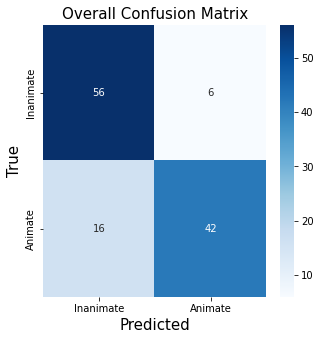

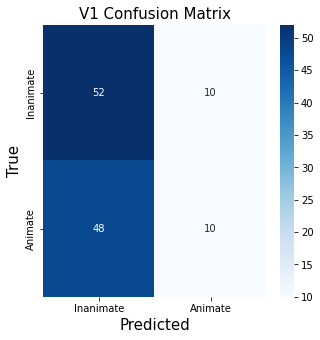

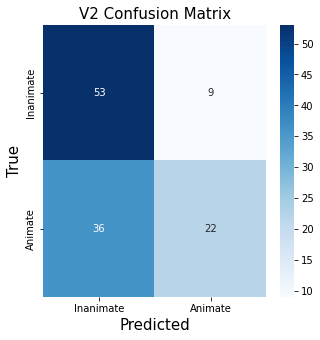

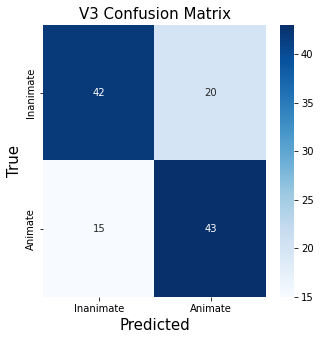

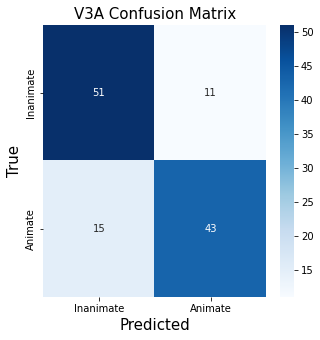

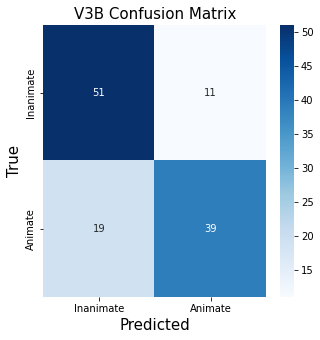

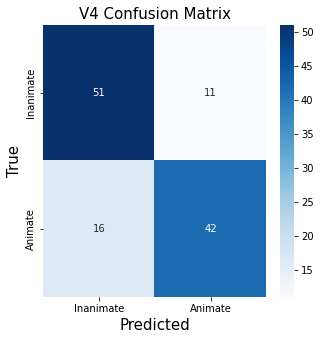

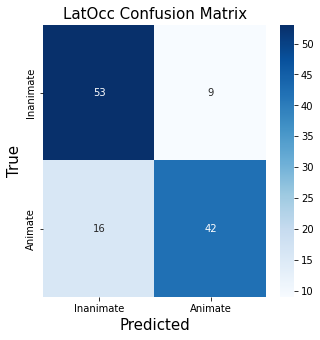

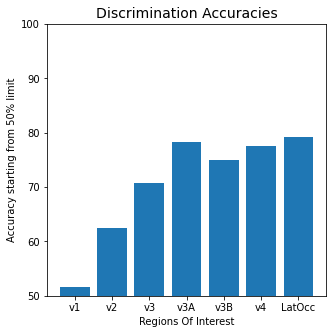

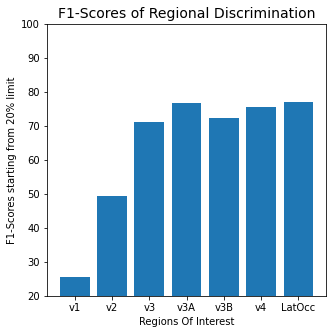

In [ ]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#################### Radical balance results

# acc_all = accuracy_score(new_labels_test_tobalance, an_ina_predict) *100

# acc_v1 = accuracy_score(new_labels_test_tobalance, an_ina_predict_v1) *100
# acc_v2 = accuracy_score(new_labels_test_tobalance, an_ina_predict_v2) *100
# acc_v3 = accuracy_score(new_labels_test_tobalance, an_ina_predict_v3) *100
# acc_v3a = accuracy_score(new_labels_test_tobalance, an_ina_predict_v3a) *100
# acc_v3b = accuracy_score(new_labels_test_tobalance, an_ina_predict_v3b) *100
# acc_v4 = accuracy_score(new_labels_test_tobalance, an_ina_predict_v4) *100
# acc_latoc = accuracy_score(new_labels_test_tobalance, an_ina_predict_latoc) *100

# fscore_all = f1_score(new_labels_test_tobalance, an_ina_predict) *100

# fscore_v1 = f1_score(new_labels_test_tobalance, an_ina_predict_v1) *100
# fscore_v2 = f1_score(new_labels_test_tobalance, an_ina_predict_v2) *100
# fscore_v3 = f1_score(new_labels_test_tobalance, an_ina_predict_v3) *100
# fscore_v3a = f1_score(new_labels_test_tobalance, an_ina_predict_v3a) *100
# fscore_v3b = f1_score(new_labels_test_tobalance, an_ina_predict_v3b) *100
# fscore_v4 = f1_score(new_labels_test_tobalance, an_ina_predict_v4) *100
# fscore_latoc = f1_score(new_labels_test_tobalance, an_ina_predict_latoc) *100

#####################

acc_all = accuracy_score(new_test_labels, an_ina_predict) *100

acc_v1 = accuracy_score(new_test_labels, an_ina_predict_v1) *100
acc_v2 = accuracy_score(new_test_labels, an_ina_predict_v2) *100
acc_v3 = accuracy_score(new_test_labels, an_ina_predict_v3) *100
acc_v3a = accuracy_score(new_test_labels, an_ina_predict_v3a) *100
acc_v3b = accuracy_score(new_test_labels, an_ina_predict_v3b) *100
acc_v4 = accuracy_score(new_test_labels, an_ina_predict_v4) *100
acc_latoc = accuracy_score(new_test_labels, an_ina_predict_latoc) *100

fscore_all = f1_score(new_test_labels, an_ina_predict) *100

fscore_v1 = f1_score(new_test_labels, an_ina_predict_v1) *100
fscore_v2 = f1_score(new_test_labels, an_ina_predict_v2) *100
fscore_v3 = f1_score(new_test_labels, an_ina_predict_v3) *100
fscore_v3a = f1_score(new_test_labels, an_ina_predict_v3a) *100
fscore_v3b = f1_score(new_test_labels, an_ina_predict_v3b) *100
fscore_v4 = f1_score(new_test_labels, an_ina_predict_v4) *100
fscore_latoc = f1_score(new_test_labels, an_ina_predict_latoc) *100



print("accuracies from v1 to v4 then LatOcc accuracy and Overall accuracy, respectively","\n",acc_v1, acc_v2, acc_v3,acc_v3a, acc_v3b, acc_v4,acc_latoc, acc_all )

print("F1-scores from v1 to v4 then LatOcc accuracy and Overall accuracy, respectively","\n",fscore_v1, fscore_v2, fscore_v3,fscore_v3a, fscore_v3b, fscore_v4,fscore_latoc, fscore_all )

#Plot confusion matrix in a beautiful manner

                       
fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm_all, annot=True, fmt = 'g', cmap="Blues"); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=15)
plt.yticks(rotation=90)
ax.xaxis.set_ticklabels(['Inanimate', 'Animate']); ax.yaxis.set_ticklabels(['Inanimate', 'Animate']);
plt.title('Overall Confusion Matrix', fontsize=15)


fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm_v1, annot=True, fmt = 'g', cmap="Blues"); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=15)
plt.yticks(rotation=90)
ax.xaxis.set_ticklabels(['Inanimate', 'Animate']); ax.yaxis.set_ticklabels(['Inanimate', 'Animate'])
plt.title('V1 Confusion Matrix', fontsize=15)

fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm_v2, annot=True, fmt = 'g', cmap="Blues"); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=15)
plt.yticks(rotation=90)
ax.xaxis.set_ticklabels(['Inanimate', 'Animate']); ax.yaxis.set_ticklabels(['Inanimate', 'Animate'])
plt.title('V2 Confusion Matrix', fontsize=15)

fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm_v3, annot=True, fmt = 'g', cmap="Blues"); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=15)
plt.yticks(rotation=90)
ax.xaxis.set_ticklabels(['Inanimate', 'Animate']); ax.yaxis.set_ticklabels(['Inanimate', 'Animate'])
plt.title('V3 Confusion Matrix', fontsize=15)

fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm_v3a, annot=True, fmt = 'g', cmap="Blues"); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=15)
plt.yticks(rotation=90)
ax.xaxis.set_ticklabels(['Inanimate', 'Animate']); ax.yaxis.set_ticklabels(['Inanimate', 'Animate'])
plt.title('V3A Confusion Matrix', fontsize=15)

fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm_v3b, annot=True, fmt = 'g', cmap="Blues"); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=15)
plt.yticks(rotation=90)
ax.xaxis.set_ticklabels(['Inanimate', 'Animate']); ax.yaxis.set_ticklabels(['Inanimate', 'Animate'])
plt.title('V3B Confusion Matrix', fontsize=15)

fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm_v4, annot=True, fmt = 'g', cmap="Blues"); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=15)
plt.yticks(rotation=90)
ax.xaxis.set_ticklabels(['Inanimate', 'Animate']); ax.yaxis.set_ticklabels(['Inanimate', 'Animate'])
plt.title('V4 Confusion Matrix', fontsize=15)

fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm_latoc, annot=True, fmt = 'g', cmap="Blues"); #annot=True to annotate cells
ax.set_xlabel('Predicted', fontsize=15)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=0)
ax.xaxis.tick_bottom()
ax.set_ylabel('True', fontsize=15)
plt.yticks(rotation=90)
ax.xaxis.set_ticklabels(['Inanimate', 'Animate']); ax.yaxis.set_ticklabels(['Inanimate', 'Animate'])
plt.title('LatOcc Confusion Matrix', fontsize=15)

# lit review v3a and latocc.

# get F1 score

# result of imbalanced data, sigmoid kernel
#V1: 57.5, V2: 59.17, V3: 73.3, V3A: 81.7, V3B: 77.5, V4: 75.8, LatOcc: 82.5, Overall: 77.5.
#F1-scores. V1:  42.7, V2: 44.9, V3: 72.4, V3A: 81.4, V3B: 75.7, V4: 74.3, LatOcc: 80.4, Overall: 73.8.

fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
ax.set_xlabel('Regions Of Interest', fontsize=10)
ax.set_ylabel('Accuracy starting from 50% limit', fontsize=10)
plt.title('Discrimination Accuracies', fontsize=14)
plt.bar(['v1', 'v2', 'v3', 'v3A', 'v3B', 'v4', 'LatOcc'],[acc_v1, acc_v2, acc_v3,acc_v3a, acc_v3b, acc_v4,acc_latoc] )
plt.ylim(50, 100)


fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
ax.set_xlabel('Regions Of Interest', fontsize=10)
ax.set_ylabel('F1-Scores starting from 20% limit', fontsize=10)
plt.title('F1-Scores of Regional Discrimination', fontsize=14)
plt.bar(['v1', 'v2', 'v3', 'v3A', 'v3B', 'v4', 'LatOcc'],[fscore_v1, fscore_v2, fscore_v3,fscore_v3a, fscore_v3b, fscore_v4,fscore_latoc] )
plt.ylim(20, 100)


# interpretation
# which brain regions are better in discriminating animate and inanimate categories?
# the debate is, is selectivity recognition or discrimination? (relating this to kirsten opinion on selectivity as power in brain regions)

# T test for further investigations 

In [ ]:
# from scipy import stats
# means_v3a = np.average(dat["responses"][:,index_v3a],axis=1)
# std_v3a = np.std(dat["responses"][:,index_v3a],axis=1)
# means_v1 = np.average(dat["responses"][:,index_v1],axis=1)
# std_v1 = np.std(dat["responses"][:,index_v1],axis=1)

# print(np.mean(means_v3a))
# print(std_v3a)

# t_test_v3a_v1 = stats.ttest_ind_from_stats(np.mean(means_v3a), np.mean(std_v3a),1750, np.mean(means_v1),np.mean(std_v1), 1750)
# print(t_test_v3a_v1)


1.801733365677397e-17


In [ ]:
# from numpy.lib.function_base import average

# # gte the model trained for all the dataset then tested on each category in each region and get the confusion matrices.

# def avg(a, b):
#   return (a+b)/2

# x_test = np.concatenate((animal_resp[400:len(animal_resp), :], geo_form_resp[100:len(geo_form_resp), :]), axis = 0 )

# x_test_animal = animal_resp[400:len(animal_resp)]
# x_test_geo = geo_form_resp[100:len(geo_form_resp_v1)]


# x_test_v1 = np.concatenate((animal_resp_v1[400:len(animal_resp_v1), :], geo_form_resp_v1[100:len(geo_form_resp_v1), :]), axis = 0 )

# x_test_animal_v1 = animal_resp_v1[400:len(animal_resp_v1)]
# x_test_geo_v1 = geo_form_resp_v1[100:len(geo_form_resp_v1)]

# x_test_animal_v2 = animal_resp_v2[400:len(animal_resp_v2)]
# x_test_geo_v2 = geo_form_resp_v2[100:len(geo_form_resp_v2)]

# x_test_animal_v3 = animal_resp_v3[400:len(animal_resp_v3)]
# x_test_geo_v3 = geo_form_resp_v3[100:len(geo_form_resp_v3)]

# x_test_animal_v4 = animal_resp_v4[400:len(animal_resp_v4)]
# x_test_geo_v4 = geo_form_resp_v4[100:len(geo_form_resp_v4)]


# # history = clf.predict(np.concatenate((animal_resp_v1[:400, :], geo_form_resp_v1[:100, :]), axis = 0 ))

# # histor_v1 = clf_v1.predict(x_test_v1)

# histor_v1_anim = clf_v1.predict(x_test_animal_v1)
# histor_v1_geo = clf_v1.predict(x_test_geo_v1)

# histor_v2_anim = clf_v2.predict(x_test_animal_v2)
# histor_v2_geo = clf_v2.predict(x_test_geo_v2)

# histor_v3_anim = clf_v3.predict(x_test_animal_v3)
# histor_v3_geo = clf_v3.predict(x_test_geo_v3)

# histor_v4_anim = clf_v4.predict(x_test_animal_v4)
# histor_v4_geo = clf_v4.predict(x_test_geo_v4)



# # classification accuracy is meant to represent the selectivity of a region

# # acc_anim_v1_new = (history == 1).sum()/ len(history)
# # acc_geo_v1_new = (history == 0).sum()/ len(history)
# # avg_v1_new = avg(acc_anim_v1_new,acc_geo_v1_new )
# # print("NEW",acc_anim_v1_new, acc_geo_v1_new , avg_v1_new )


# acc_anim_v1 = (histor_v1_anim == 1).sum()/ len(x_test_animal_v1)
# acc_geo_v1 = (histor_v1_geo == 0).sum()/ len(x_test_geo_v1)
# avg_v1 = avg(acc_anim_v1,acc_geo_v1 )

# acc_anim_v2 = (histor_v2_anim == 1).sum()/ len(x_test_animal_v2)
# acc_geo_v2 = (histor_v2_geo == 0).sum()/ len(x_test_geo_v2)
# avg_v2 = avg(acc_anim_v2,acc_geo_v2 )

# acc_anim_v3 = (histor_v3_anim == 1).sum()/ len(x_test_animal_v3)
# acc_geo_v3 = (histor_v3_geo == 0).sum()/ len(x_test_geo_v3)
# avg_v3 = avg(acc_anim_v3,acc_geo_v3 )

# acc_anim_v4 = (histor_v4_anim == 1).sum()/ len(x_test_animal_v4)
# acc_geo_v4 = (histor_v4_geo == 0).sum()/ len(x_test_geo_v4)
# avg_v4 = avg(acc_anim_v4,acc_geo_v4 )


# plt.rcParams["figure.figsize"] = [10, 10]
# # plt.xlabel("Regions From V1 to V4")
# # plt.ylabel("Average Accuracy of Animate-Inabimate classification")

# # plt.plot((1,2,3,4),(avg_v1, avg_v2, avg_v3,avg_v4))
# # plt.show()

# plt.xlabel("Regions From V1 to V4")
# plt.ylabel("Average Accuracy of Animate-Inabimate classification")
# plt.bar(('V1','V2','V3','V4'), (avg_v1, avg_v2, avg_v3,avg_v4) , width=0.5 )
# plt.show()

# plt.xlabel("Regions From V1 to V4")
# plt.ylabel("Average Accuracy of Animate classification")
# plt.bar(('V1','V2','V3','V4'), (acc_anim_v1, acc_anim_v2, acc_anim_v3,acc_anim_v4) , width=0.5 )
# plt.show()

# plt.xlabel("Regions From V1 to V4")
# plt.ylabel("Average Accuracy of Inanimate classification")
# plt.bar(('V1','V2','V3','V4'), (acc_geo_v1, acc_geo_v2, acc_geo_v3,acc_geo_v4) , width=0.5 )
# plt.show()

# print( "accuracies of animate, inanimate in v1, v2, v3, v4, average of each region. Respectively", "\n",acc_anim_v1,  acc_geo_v1,avg_v1,"\n", acc_anim_v2, acc_geo_v2,avg_v2,
#       "\n", acc_anim_v3, acc_geo_v3,avg_v3,"\n", acc_anim_v4, acc_geo_v4, avg_v4 )

In [ ]:
# print(dat["responses"].shape)
# print(dat["responses"][0])

# arr_resp= dat["responses"][0].flatten() #convert ndarray(from the dictionary) to array
# print(arr_resp)

# print(dat["roi_names"][dat["roi"][result[0]]])

# import matplotlib.pylab as plt
# plt.rcParams["figure.figsize"] = [30, 10]
# plt.plot(response_for1)
# plt.show()

This is the number of voxels in each ROI. Note that `"Other"` voxels have been removed from this version of the dataset:

In [ ]:
dict(zip(dat["roi_names"], np.bincount(dat["roi"])))

Each stimulus is a 128 x 128 grayscale array:

In [ ]:
# import cv2
# import copy as cp

# new_labels = np.load('kay_labels.npy')
# new_labels = new_labels[0]

# def label_show(show):

#         fig, axs = plt.subplots( figsize=(12, 6))
#         axs.imshow(dat["stimuli"][show,:], cmap="gray")
#         axs.set_title(labels[0][show])
#         fig.tight_layout()
#         fig.show()

# def new_label(old_label, new_label):
#      new_labels[old_label] = new_label


# def new_label_show(show):
#         fig, axs = plt.subplots(  figsize=(12, 6))
#         axs.imshow(dat["stimuli"][show,:], cmap="gray")
#         axs.set_title(new_labels[show])
#         fig.tight_layout()
#         fig.show()




In [ ]:
# # RULE:
# # anything other than humans and animals are inanimate.

# # ziad index: 0 - 440
# # yasmine index: 441 - 880
# # esraa index: 881 - 1320
# # amira index: 1321 - 1750

# ######################################## HERE YOU WILL WORK ON RELABELING

# index_to_show = 1321
# value_of_new_label = 0 # zero or one. zero for Inanimate and one for Animate

# #########################

# label_show(index_to_show) # insert the image index that you want to see its label. NOTE: index starts from zero

# new_label(index_to_show, value_of_new_label) # convert old label index to the new label. zero for Inanimate and one for Animate

# new_label_show(index_to_show)

# ################# save in a file, download it every few relabeling task

# pd.DataFrame(new_labels).to_csv("/content/new_labels.csv")

# print(new_labels[index_to_show])

In [ ]:
# import cv2
# import copy as cp

# new_test_labels = np.load('kay_labels_val.npy')
# new_test_labels = new_test_labels[0]

# def label_show(show):

#         fig, axs = plt.subplots(  figsize=(12, 6))
#         axs.imshow(dat["stimuli_test"][show,:], cmap="gray")
#         axs.set_title(val_labels[0][show])
#         fig.tight_layout()
#         fig.show()

# def new_label(old_label, new_label):
#      new_test_labels[old_label] = new_label


# def new_label_show(show):
#         fig, axs = plt.subplots(  figsize=(12, 6))
#         axs.imshow(dat["stimuli_test"][show,:], cmap="gray")
#         axs.set_title(new_test_labels[show])
#         fig.tight_layout()
#         fig.show()


In [ ]:
# # RULE:
# # anything other than humans and animals are inanimate.

# # Test dataset index: 0- 120 

# ######################################## HERE YOU WILL WORK ON RELABELING

# index_to_show = 1
# value_of_new_label = 1 # zero or one. zero for Inanimate and one for Animate

# #########################

# label_show(index_to_show) # insert the image index that you want to see its label. NOTE: index starts from zero

# new_label(index_to_show, value_of_new_label) # convert old label index to the new label. zero for Inanimate and one for Animate

# new_label_show(index_to_show)

# ################# save in a file, download it every few relabeling task

# pd.DataFrame(new_test_labels).to_csv("/content/new_test_labels.csv")

# print(new_test_labels[index_to_show])

Each stimulus is associated with a pattern of BOLD response across voxels in visual cortex:

In [ ]:

# from skimage.io import imread, imshow
# from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
# from skimage import color, exposure, transform
# from skimage.exposure import equalize_hist


# sf_image = (np.fft.fft2(dat["stimuli"])) # We removed the np.fft.fftshift (here was the syntax of fft2)
# print(sf_image.shape)


# fig, axs = plt.subplots(4, 9,  figsize=(12, 6), sharex=True, sharey=True)
# for ax, im, lbl in zip(axs.flat, np.log(abs(sf_image)), labels[0, :]):
#   ax.imshow(im, cmap="gray")
#   ax.set_title(lbl)

# fig.tight_layout()
# fig.show()


######################## extract the features of brightness and contrast from spatial frequency images
# brightness = []
# contrast = []

# for image in range(len(sf_image)):

#   brightness.append(np.average(np.log(abs(sf_image[image]))))
#   contrast.append(np.std(sf_image[image])) 


# print("shape of brightness and contrast lists, respectively:",len(brightness),"    " ,len(contrast)) # each shape must be 1750 (all images)

##########################

# plt.figure(num=None, figsize=(8, 6), dpi=80)
# plt.imshow(np.log(abs(sf_image)), cmap='gray'); 


# what we know, what we expect, how to tests it.

# make predictions clearer
# how many classes are we intrested in, what classes? and why those classes?

# Why do we expect there is gonna be a difference in these classes? the ans is img features

# for image features
# brightnes (mean of pixels ), contrast (stand dev of img), orientation, spatial freq

# removing the human (labels) from the loop by looking at image features vs responses. 

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 5))
# ax.set(xlabel="Voxel", ylabel="Stimulus")
# heatmap = ax.imshow(response_for1,
#                     aspect="auto", vmin=0, vmax=1, cmap="bwr")
# fig.colorbar(heatmap, shrink=.5, label="Response amplitude (Z)")
# fig.tight_layout()
# fig.show()

The training/validation splits from the original paper are retained, so the 120 test stimuli and responses are in separate data structures:

In [ ]:
# fig, ax = plt.subplots(figsize=(12, 2.5))
# ax.set(xlabel="Voxel", ylabel="Test Stimulus")

# heatmap = ax.imshow(dat["responses_test"],
#                     aspect="auto", vmin=-1, vmax=1, cmap="bwr")
# fig.colorbar(heatmap, shrink=.75, label="Response amplitude (Z)")
# fig.tight_layout()
# fig.show()